In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from typing import List, Tuple, Dict
import os
import json

import cv2

from PIL import Image

from modules.explore_data.walk_through_dir import display_folder_content
from modules.explore_data.data_sample import display_content
from modules.explore_data.json_sample import JSONSample
from modules.explore_data.csv_sample import CSVSample
from modules.explore_data.txt_sample import TXTSample
from modules.explore_data.image_viewer import display_image

In [2]:
PATH = '../data'

In [3]:
data = {}

for folder in os.listdir(PATH):
    total = len(os.listdir(os.path.join(PATH, folder)))
    print('{:60s}{:2d}'.format(folder, total))
    
    if total > 0:
        data[folder] = {
            'classes': [],
        }

ego_exo4d                                                    0
ego_hands                                                    3
custom_hands                                                 4
sign_language_mnist                                          7
hagrid                                                       5
multi_modal_dataset_for_hand_gesture_recognition             0
hand_gesture_recognition_database                           10
hand_sign_recognition                                        0
sign_language_for_numbers                                   11
2015_msra_hand_gesture_dataset                              10
hand_detection_dataset                                       2
hand_recognition_dataset_for_machine_vision_researchers      6
left_and_right                                               4
safeness                                                     6
mvhand                                                       4
rendered_handpose_dataset                              

In [4]:
print(*sorted(data.keys()), sep='\n')

2014_msra_hand_tracking_dataset
2015_msra_hand_gesture_dataset
custom_hands
ego_hands
hagrid
hanco
hand_detection_dataset
hand_gesture_recognition_database
hand_recognition_dataset_for_machine_vision_researchers
hands_and_palm_images_dataset_11k_hands
left_and_right
mvhand
rendered_handpose_dataset
safeness
sign_language_for_numbers
sign_language_mnist


---

## [2014 MSRA Hand Tracking Dataset](https://jimmysuen.github.io/)

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
NO | **Depth Classification** | 713MB | 2,400 (320x240) Intel's Creative Interactive Gesture Camera depth images | None | None | None | 6 (right hands) | Various rapid gestures in a 400-frame video sequence | None

Description:

* to account for different hand sizes, a global hand model scale is specified for each subject: 1.1, 1.0, 0.9, 0.95, 1.1, 1.0 for subject 1~6, respectively
* the camera intrinsic parameters are: principle point = image center(160, 120), focal length = 241.42
* `*.bin` file stores the depth pixel values in row scanning order, which are 320*240 floats
* `*.bin` file is binary and needs to be opened with `std::ios::binary` flag
* the unit is millimeters
* `joint.txt` file stores 400 frames x 21 hand joints per frame. Each line has 3 * 21 = 63 floats for 21 3D points in (x, y, z) coordinates
* the 21 hand joints are: *wrist, index_mcp, index_pip, index_dip, index_tip, middle_mcp, middle_pip, middle_dip, middle_tip, ring_mcp, ring_pip, ring_dip, ring_tip, little_mcp, little_pip, little_dip, little_tip, thumb_mcp, thumb_pip, thumb_dip, thumb_tip*
* the corresponding `*.jpg` file is just for visualization of depth and ground truth joints

In [5]:
display_folder_content(
    path=os.path.join(PATH, '2014_msra_hand_tracking_dataset')
)

,path,dir,total_inner_dirs,total_inner_files,inner_types
0,../data,2014_msra_hand_tracking_dataset,6,1,.txt
1,../data/2014_msra_hand_tracking_dataset,Subject1,0,801,".txt, .bin, .jpg"
2,../data/2014_msra_hand_tracking_dataset,Subject2,0,801,".txt, .bin, .jpg"
3,../data/2014_msra_hand_tracking_dataset,Subject3,0,801,".txt, .bin, .jpg"
4,../data/2014_msra_hand_tracking_dataset,Subject4,0,801,".txt, .bin, .jpg"
5,../data/2014_msra_hand_tracking_dataset,Subject5,0,801,".txt, .bin, .jpg"
6,../data/2014_msra_hand_tracking_dataset,Subject6,0,801,".txt, .bin, .jpg"


'ID:'

346

-15.0994, -13.9746, -379.073, -24.7132, 7.60349, -314.281, -32.2438, 10.1928, -284.529, -32.3591, 9.70878, -261.434, -25.9815, 6.4787, -241.795, -35.4373, -12.2249, -307.656, -24.3232, -18.6494, -273.702, -9.57792, -25.83, -255.907, 7.23349, -33.602, -244.034, -43.2106, -30.6131, -308.859, -41.8165, -32.5893, -277.051, -22.6149, -40.7931, -277.948, -13.1892, -44.0987, -295.044, -45.1818, -54.4503, -316.765, -23.4592, -57.9165, -309.714, -11.8507, -52.7646, -316.286, -7.38386, -44.3154, -328.361, -0.64855, -23.1022, -353.61, 8.55583, -25.4943, -328.042, 5.08398, -35.6497, -308.837, -12.4211, -48.6933, -311.564


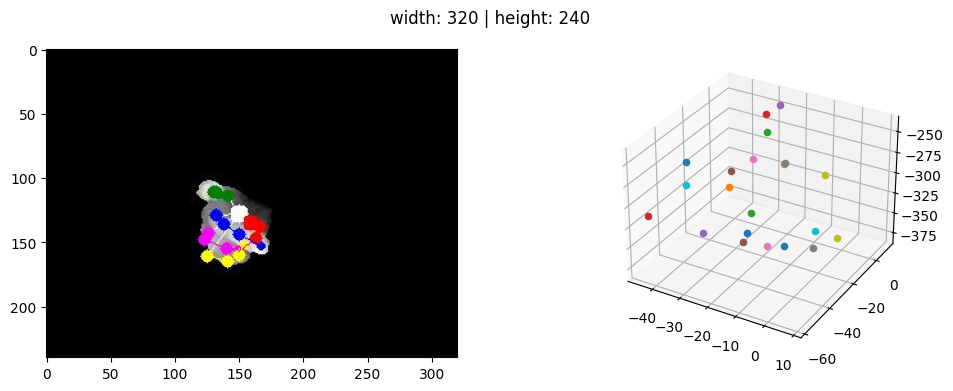

In [6]:
display_content(
    module=TXTSample,
    path=os.path.join(PATH, '2014_msra_hand_tracking_dataset/Subject1'), 
    path_images=os.path.join(PATH, '2014_msra_hand_tracking_dataset/Subject1'), 
    landmarks=True
)

In [7]:
path = os.path.join(PATH, '2014_msra_hand_tracking_dataset/Subject1')
path = os.path.join(path, [file for file in os.listdir(path) if '.bin' in file][0])

with open(path, 'rb') as file:
    data = file.read()

data

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

---

## [2015 MSRA Hand Gesture Dataset](https://jimmysuen.github.io/)

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [8]:
display_folder_content(
    path=os.path.join(PATH, '2015_msra_hand_gesture_dataset'),
    inner_dir_name='P0'
)

,path,dir,total_inner_dirs,total_inner_files,inner_types
0,../data,2015_msra_hand_gesture_dataset,9,1,.txt
1,../data/2015_msra_hand_gesture_dataset,P0,17,0,
2,../data/2015_msra_hand_gesture_dataset/P0,1,0,1001,".txt, .bin, .jpg"
3,../data/2015_msra_hand_gesture_dataset/P0,2,0,1001,".txt, .bin, .jpg"
4,../data/2015_msra_hand_gesture_dataset/P0,3,0,1001,".txt, .bin, .jpg"
...,...,...,...,...,...
158,../data/2015_msra_hand_gesture_dataset/P8,MP,0,1001,".txt, .bin, .jpg"
159,../data/2015_msra_hand_gesture_dataset/P8,RP,0,1001,".txt, .bin, .jpg"
160,../data/2015_msra_hand_gesture_dataset/P8,T,0,1001,".txt, .bin, .jpg"
161,../data/2015_msra_hand_gesture_dataset/P8,TIP,0,1001,".txt, .bin, .jpg"


Total unique classes: 17


'ID:'

356

-16.5621, -66.9853, -403.417, -5.21384, -27.875, -347.761, -13.1249, -14.1685, -321.338, -19.0006, -4.45582, -301.219, -23.8819, 0.869739, -281.607, -28.0512, -25.9403, -342.586, -34.5092, -38.9387, -309.314, -26.7667, -61.3537, -314.137, -18.5271, -78.0128, -325.909, -47.8518, -28.3519, -344.041, -51.78, -36.5768, -313.471, -47.6769, -57.0642, -313.962, -42.7833, -66.6926, -330.557, -69.4003, -40.2546, -349.388, -62.9092, -39.2922, -327.24, -60.1172, -53.2795, -326.215, -61.8333, -63.2629, -337.815, -17.5216, -75.7615, -373.967, -15.323, -76.8777, -346.799, -34.614, -69.3144, -339.406, -54.0768, -61.6782, -332.559


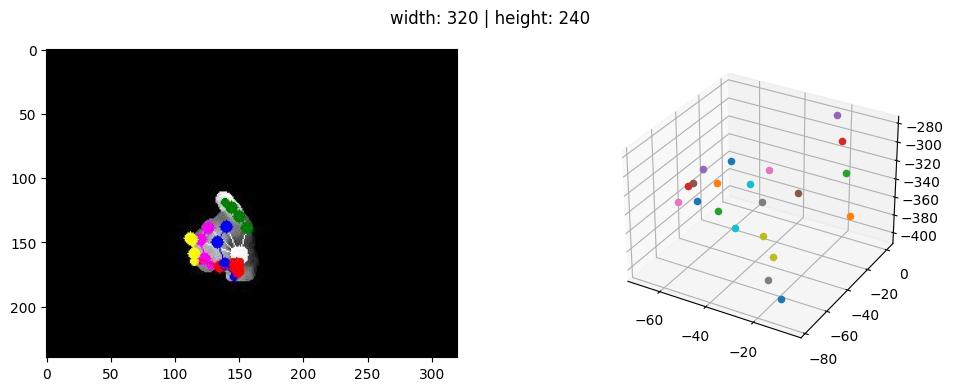

In [9]:
display_content(
    module=TXTSample,
    path=os.path.join(PATH, '2015_msra_hand_gesture_dataset/P0/1'), 
    path_images=os.path.join(PATH, '2015_msra_hand_gesture_dataset/P0/1'), 
    landmarks=True
)

---

 'custom_hands',

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

---

## [EgoHands: A Dataset for Hands in Complex Egocentric Interactions](https://vision.soic.indiana.edu/projects/egohands/)

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [10]:
display_folder_content(
    path=os.path.join(PATH, 'ego_hands'),
    inner_dir_name='labeled_data/_LABELLED_SAMPLES'
)

,path,dir,total_inner_dirs,total_inner_files,inner_types
0,../data,ego_hands,3,0,
1,../data/ego_hands,labeled_data,1,9,".txt, .m, .mat"
2,../data/ego_hands/labeled_data,_LABELLED_SAMPLES,48,0,
3,../data/ego_hands/labeled_data/_LABELLED_SAMPLES,CARDS_COURTYARD_B_T,0,101,".mat, .jpg"
4,../data/ego_hands/labeled_data/_LABELLED_SAMPLES,CARDS_COURTYARD_H_S,0,101,".mat, .jpg"
...,...,...,...,...,...
96,../data/ego_hands/all_frames,puzzle_livingroom_T_B,0,2700,.jpg
97,../data/ego_hands/all_frames,puzzle_office_B_H,0,2700,.jpg
98,../data/ego_hands/all_frames,puzzle_office_H_B,0,2700,.jpg
99,../data/ego_hands/all_frames,puzzle_office_S_T,0,2700,.jpg


Total unique classes: 48


---

## [HaGRID - HAnd Gesture Recognition Image Dataset](https://www.kaggle.com/datasets/kapitanov/hagrid)

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
NO | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

* [] Trainval (images) + annotations
* [] Test (images) + annotations
* [x] Subsample (images) + annotations

The annotations consist of:

* `bboxes` of hands with gesture labels in COCO format `[top left X position, top left Y position, width, height]`
* `landmarks` in format `[x,y]` relative image coordinates
* `leading_hands` (`left` of `right` for gesture hand) 
* `leading_conf` as confidence for `leading_hand` annotation
* `user_id` allow you to split the train / val dataset

In [11]:
display_folder_content(
    path=os.path.join(PATH, 'hagrid'), 
    inner_dir_name='subsample'
)

,path,dir,total_inner_dirs,total_inner_files,inner_types
0,../data,hagrid,5,0,
1,../data/hagrid,ann_subsample,0,18,.json
2,../data/hagrid,ann_test,0,18,.json
3,../data/hagrid,ann_train_val,0,18,.json
4,../data/hagrid,train_val,0,1,.zip
5,../data/hagrid,subsample,18,0,
6,../data/hagrid/subsample,call,0,100,.jpg
7,../data/hagrid/subsample,dislike,0,100,.jpg
8,../data/hagrid/subsample,fist,0,100,.jpg
9,../data/hagrid/subsample,four,0,100,.jpg


Total unique classes: 18


ID: 005731ed-cab2-44c5-8fbc-384005cee981


{'bboxes': [[0.28580762, 0.23508022, 0.29957347, 0.43437167]],
 'labels': ['four'],
 'landmarks': [[[0.4601536989212036, 0.6514119505882263],
   [0.5218698382377625, 0.6216142177581787],
   [0.5548691153526306, 0.5672289729118347],
   [0.496560275554657, 0.533733069896698],
   [0.4356935918331146, 0.5222437381744385],
   [0.5108970999717712, 0.4706007242202759],
   [0.5051671862602234, 0.3942488133907318],
   [0.5033401250839233, 0.34459954500198364],
   [0.5010730624198914, 0.3011407256126404],
   [0.4599376320838928, 0.46689876914024353],
   [0.4414824843406677, 0.3795558214187622],
   [0.4302487075328827, 0.3202846050262451],
   [0.42091310024261475, 0.27055823802948],
   [0.42013248801231384, 0.48436957597732544],
   [0.391495943069458, 0.4051707983016968],
   [0.3707137405872345, 0.3535597622394562],
   [0.35299524664878845, 0.30793657898902893],
   [0.386106014251709, 0.5173988938331604],
   [0.36087581515312195, 0.4646339416503906],
   [0.33839309215545654, 0.4281527101993561],


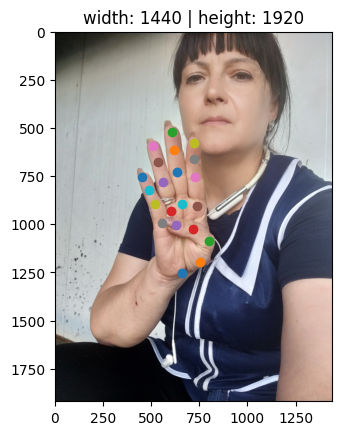

In [12]:
display_content(
    module=JSONSample,
    path=os.path.join(PATH, 'hagrid/ann_subsample'), 
    path_images=os.path.join(PATH, 'hagrid/subsample'), 
    field_name='landmarks',
    landmarks=True
)

---

'hanco'

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [13]:
display_folder_content(
    path=os.path.join(PATH, 'hanco')
)

,path,dir,total_inner_dirs,total_inner_files,inner_types
0,../data,hanco,10,1,.json
1,../data/hanco,calib,1,0,
2,../data/hanco/calib,0110,0,67,.json
3,../data/hanco,mask_fg,1,0,
4,../data/hanco/mask_fg,0110,8,0,
...,...,...,...,...,...
79,../data/hanco/shape,cam5,0,67,.json
80,../data/hanco/shape,cam6,0,67,.json
81,../data/hanco/shape,cam7,0,67,.json
82,../data/hanco,xyz,1,0,


---

 'hand_detection_dataset',

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [14]:
display_folder_content(
    path=os.path.join(PATH, 'hand_detection_dataset'),
    inner_dir_name='hands'
)

,path,dir,total_inner_dirs,total_inner_files,inner_types
0,../data,hand_detection_dataset,1,1,.csv
1,../data/hand_detection_dataset,hands,2,0,
2,../data/hand_detection_dataset/hands,NoObject,0,15000,.png
3,../data/hand_detection_dataset/hands,Object,0,15000,.png


Total unique classes: 2


---

## [Hand Gesture Recognition Database](https://www.kaggle.com/datasets/gti-upm/leapgestrecog)

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
NO | **Segmentation Depth** | 1,06GB | 20,000 Leap Motion sensor images | **10** | None | None | 10 (unique persons) | The folder name is the identifier of each different subject | None

In [15]:
sample = display_folder_content(
    path=os.path.join(PATH, 'hand_gesture_recognition_database'), 
    inner_dir_name='00', 
    return_data=True
)

print('Unique quantity of inner files:', sample.data['total_inner_files'].unique())

,path,dir,total_inner_dirs,total_inner_files,inner_types
0,../data,hand_gesture_recognition_database,10,0,
1,../data/hand_gesture_recognition_database,00,10,0,
2,../data/hand_gesture_recognition_database/00,01_palm,0,200,.png
3,../data/hand_gesture_recognition_database/00,02_l,0,200,.png
4,../data/hand_gesture_recognition_database/00,03_fist,0,200,.png
...,...,...,...,...,...
106,../data/hand_gesture_recognition_database/09,06_index,0,200,.png
107,../data/hand_gesture_recognition_database/09,07_ok,0,200,.png
108,../data/hand_gesture_recognition_database/09,08_palm_moved,0,200,.png
109,../data/hand_gesture_recognition_database/09,09_c,0,200,.png


Total unique classes: 10
Unique quantity of inner files: [0 200]


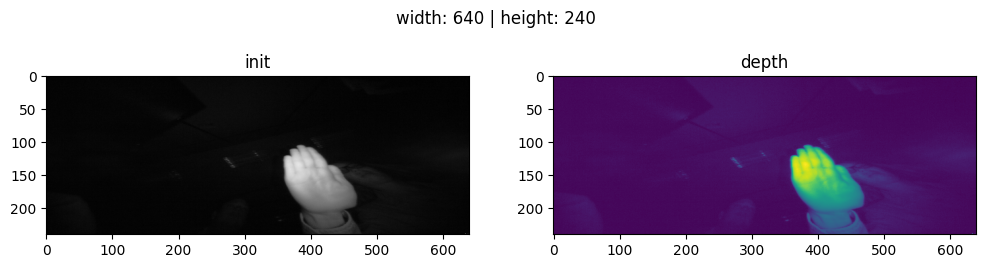

In [16]:
display_image(
    path=os.path.join(PATH, 'hand_gesture_recognition_database/00/01_palm'),
    depth_map=True
)

---

 'hand_recognition_dataset_for_machine_vision_researchers',

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [17]:
display_folder_content(
    path=os.path.join(PATH, 'hand_recognition_dataset_for_machine_vision_researchers')
)

,path,dir,total_inner_dirs,total_inner_files,inner_types
0,../data,hand_recognition_dataset_for_machine_vision_re...,3,3,".txt, .yaml"
1,../data/hand_recognition_dataset_for_machine_v...,test,2,0,
2,../data/hand_recognition_dataset_for_machine_v...,images,0,40,.jpg
3,../data/hand_recognition_dataset_for_machine_v...,labels,0,40,.txt
4,../data/hand_recognition_dataset_for_machine_v...,train,2,0,
5,../data/hand_recognition_dataset_for_machine_v...,images,0,283,.jpg
6,../data/hand_recognition_dataset_for_machine_v...,labels,0,283,.txt
7,../data/hand_recognition_dataset_for_machine_v...,valid,2,0,
8,../data/hand_recognition_dataset_for_machine_v...,images,0,80,.jpg
9,../data/hand_recognition_dataset_for_machine_v...,labels,0,80,.txt


---

## [Hands and palm images dataset (11K Hands)](https://www.kaggle.com/datasets/shyambhu/hands-and-palm-images-dataset)

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
NO | **Classification** | 2,59GB | 11,076 (1600 x 1200 pixels) RGB images | **18** | None | None | 190 | Dorsal and palmar sides with a uniform white background | Same distance from the camera

In [18]:
display_folder_content(
    path=os.path.join(PATH, 'hands_and_palm_images_dataset_11k_hands')
)

,path,dir,total_inner_dirs,total_inner_files,inner_types
0,../data,hands_and_palm_images_dataset_11k_hands,2,3,".txt, .mat, .csv"
1,../data/hands_and_palm_images_dataset_11k_hands,Hands,0,11076,.jpg
2,../data/hands_and_palm_images_dataset_11k_hands,skin_masks,0,11076,.jpg


ID: Hand_0000002.jpg


{'id': 0,
 'age': 27,
 'gender': 'male',
 'skinColor': 'fair',
 'accessories': 0,
 'nailPolish': 0,
 'aspectOfHand': 'dorsal right',
 'irregularities': 0}

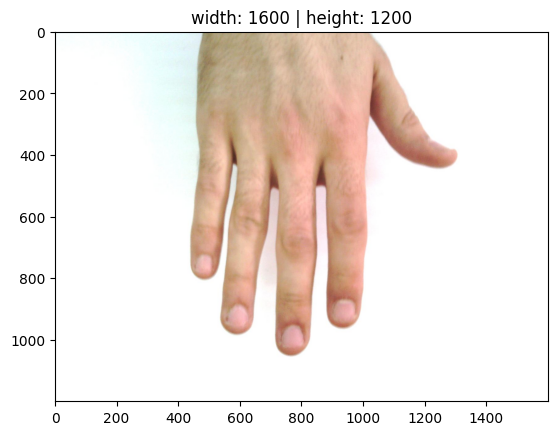

In [19]:
display_content(
    module=CSVSample,
    path=os.path.join(PATH, 'hands_and_palm_images_dataset_11k_hands/HandInfo.csv'), 
    path_images=os.path.join(PATH, 'hands_and_palm_images_dataset_11k_hands/Hands'), 
    field_name='imageName'
)

---

 'left_and_right',

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [ ]:
display_folder_content(
    path=os.path.join(PATH, 'left_and_right')
)

---

 'mvhand',

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [ ]:
display_folder_content(
    path=os.path.join(PATH, 'mvhand')
)

---

 'rendered_handpose_dataset',

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [ ]:
display_folder_content(
    path=os.path.join(PATH, 'rendered_handpose_dataset')
)

---

 'safeness',

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [ ]:
display_folder_content(
    path=os.path.join(PATH, 'safeness')
)

---

## [Sign Language for Numbers](https://www.kaggle.com/datasets/muhammadkhalid/sign-language-for-numbers)

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
NO | **Classification** | 44,9MB | 16,500 RGB images | **10** | **1** (1,500 samples (`Unknown`) | None | None | None | None

In [ ]:
display_folder_content(
    path=os.path.join(PATH, 'sign_language_for_numbers'), 
    inner_dir_name=''
)

In [ ]:
display_image(
    path=os.path.join(PATH, 'sign_language_for_numbers/0'),
    depth_map=True
)

---

 'sign_language_mnist',

FirstPerson | Tasks | Size | Images | TotalClasses | ExtraClass | TrainTest | UniqueScenes | ScenesType | DistanceFromCamera
-|-|-|-|-|-|-|-|-|-
YES | **Classification Detection** | 716GB | 552,992 FullHD (1920 × 1080) RGB images | **18** | **1** (123,589 samples (`no_gesture` if there is a second free hand in the frame) | 92% 8% | 34,730 (unique persons) | Mainly indoor (variation in lighting, artificial and natural light, facing and backing to a window) | 0.5-4 meters

In [ ]:
display_folder_content(
    path=os.path.join(PATH, 'sign_language_mnist')
)

In [ ]:
PATH = 'data/'

In [ ]:
os.listdir(PATH)

In [ ]:
image = cv.imread(os.path.join(PATH, 'right_hand_back.jpg'))
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [ ]:
plt.imshow(image)

In [ ]:
def plot_image_before_after(img_before: np.ndarray, 
                            img_after: np.ndarray,
                            titles: List[str] = ['init', 'transformed']) -> None:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6))
    title_before, title_after = titles
    
    ax1.imshow(img_before)
    ax1.set_title(title_before.capitalize())
    
    ax2.imshow(img_after)
    ax2.set_title(title_after.capitalize())
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [ ]:
plot_image_before_after(image, 255 - image)

In [ ]:
plot_image_before_after(
    image, 
    cv.filter2D(
        image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]) 
    )
)